       Day temp_max/temp_min                     Details
0    Today           57°/43°  AM Clouds/PM Sun5%W 15 mph
1   Fri 11           55°/47°   Mostly Cloudy15%WNW 9 mph
2   Sat 12           57°/49°         Showers45%SW 12 mph
3   Sun 13           58°/48°        Showers75%SSW 15 mph
4   Mon 14           57°/44°   Partly Cloudy15%WNW 9 mph
5   Tue 15           57°/46°    Partly Cloudy20%SW 7 mph
6   Wed 16           58°/46°      PM Showers35%SSW 9 mph
7   Thu 17           58°/45°   Partly Cloudy20%WNW 8 mph
8   Fri 18           57°/45°         Showers35%SSW 7 mph
9   Sat 19           58°/44°           Showers40%W 9 mph
10                      None                        None


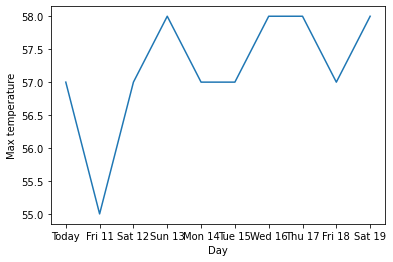

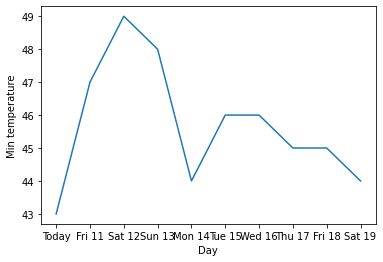

In [39]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
page = requests.get("https://weather.com/weather/tenday/l/San+Francisco+CA?canonicalCityId=dfdaba8cbe3a4d12a8796e1f7b1ccc7174b4b0a2d5ddb1c8566ae9f154fa638c")
soup =BeautifulSoup(page.content, 'html.parser')
content=""
for i in range(0,10):
    sp3=soup.find('div',id="detailIndex{0}".format(i))
    text=sp3.get_text()
    s=""
    if i==0:
        for k in range(0,len(text)):
            if k==4 or k==11 :
                s=s+text[k]+","
            else:
                 s=s+text[k]
                
        content=content+s+"\n"           
    else: 
        for id in range(0,len(text)):
            if id==5 or id==12:
                s=s+text[id]+","
            else:
                s=s+text[id]
        content=content+s+'\n'

data=content
df_details= pd.DataFrame([x.split(',') for x in data.split('\n')],columns=['Day', 'temp_max/temp_min', 'Details'])
print(df_details)
lst_temp=df_details['temp_max/temp_min'].tolist()
lst_day=df_details['Day'].tolist()
lst_max=[]
lst_min=[]
lst_temp_upd=lst_temp[:-1]
lst_day_upd=lst_day[:-1]
for i in lst_temp_upd:
    p=i.strip('°')
    s=p.split('/')
    lst_max.append(int(s[0].strip('°')))
    lst_min.append(int(s[1]))
#print(lst_max)   
#print(lst_min)
from matplotlib import pyplot as plt
plt.plot(lst_day_upd,lst_max)
plt.xlabel('Day')
plt.ylabel('Max temperature')
plt.show()
plt.plot(lst_day_upd,lst_min)
plt.xlabel('Day')
plt.ylabel('Min temperature')
plt.show()